C:\Users\IAN\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - binary_accuracy: 0.6577 - loss: 0.6769 - val_binary_accuracy: 0.8162 - val_loss: 0.6218
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8467 - loss: 0.5951 - val_binary_accuracy: 0.8514 - val_loss: 0.5457
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8725 - loss: 0.5158 - val_binary_accuracy: 0.8631 - val_loss: 0.4768
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8901 - loss: 0.4383 - val_binary_accuracy: 0.8643 - val_loss: 0.4241


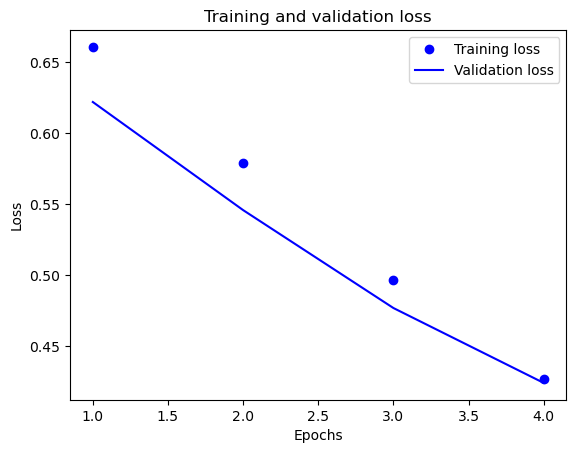

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

def vectorize_seq(seqs, dimension=10000):
    results = np.zeros((len(seqs), dimension))
    for i, seq in enumerate(seqs):
        results[i,seq] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

optimizer = optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = optimizer,
              loss = losses.binary_crossentropy, #loss = 'binary_crossentropy'
              metrics = [metrics.binary_accuracy]) # metrics = ['accuracy']
#驗證資料
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
Epochs = range(1, len(loss_values)+1)
plt.plot(Epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(Epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

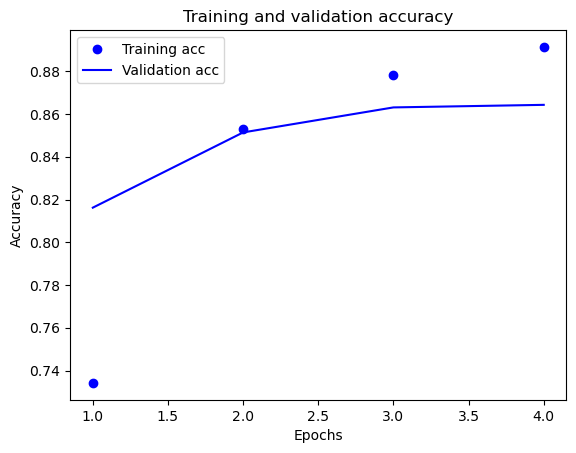

In [2]:
plt.clf()
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(Epochs, acc, 'bo', label = 'Training acc')
plt.plot(Epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [3]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.435034  ],
       [0.8336287 ],
       [0.6758273 ],
       ...,
       [0.2788024 ],
       [0.3519521 ],
       [0.50624084]], dtype=float32)